# 1. Lecture overview

Given a set of risky assets, what is the best portfolio we can construct with them? Assuming we are mean-variance optimizers, this amounts to finding the set of weights that gives us the portolio with the **maximum Sharpe ratio** (i.e. the portfolio that gives us the best expected return per unit of risk). We start by learning how to do this for the special case when we only have two risky assets and then move on to the general case with an arbitrary ("N") number of assets. These maximum Sharpe ratio portfolios are also called **optimal risky portfolios** or **tangency portfolios**.

Besides learning the mechanics of building optimal risky portfolios, another key lesson from this lecture is that the optimal risky portfolio does not depend on who the investor is: it does not depend on their risk aversion. What depends on their risk aversion is the proportion of their funds they should invest in this optimal risky portfolio. We touched on this in the previous lecture and we will talk about it in much more detail in the following lecture.

- Portfolio optimization with two risky assets
    - The investment opportunity set
    - Tangency portfolio 
    
- Portfolio optimization with N risky assets
    - Matrix representation
    - Tangency portfolio

# 2. Portfolio optimization with two risky assets

We start with the simples possible case, when we have only two risky assets that we want to combine in an optimal portfolio. Call those assets A and B, and assume we have already estimated their expected returns ($E[R_A]$ and $E[R_B]$), their standard deviations ($\sigma_A$ and $\sigma_B$) and their covariance ($COV[R_A, R_B]$ sometimes denoted $\rho_{AB}$).

The only thing we have to decide is what proportion of the portfolio consists of asset A (call this $w_A$), because this will give us the proportion in asset B: $w_B = 1 - w_A$. As mentioned above, this amounts to finding the $w_A$ that gives us the portfolio with the highers possible Sharpe ratio. Before we do this (in Section 2.2.) we first construct a large number of portfolios for different values of $w_A$ to get a better sense of how these portfolios look like from a mean-variance perspective. 


## 2.1. The investment opportunity set 

The investment opportunity set for a given collection of assets is the set of ALL the possible portfolios you can construct with those assets. This is an infinite set but we can get a good idea of what the investment opportunity set looks like by just building a small subset of portfolios and plotting them in mean-volatility space.

In the special case with only two risky assets A and B, using the notation above, for any choice of weights ($w_A$, $w_B$) we obtain a different portfolio P. Recall that the expected return and variance of the resulting portfolio P are given by:

$$E[R_P] = w_A E[R_A] + w_B E[R_B]$$


$$Var[R_P] =  w_{A}^2 Var[R_A] + w_{B}^2 Var[R_B] + 2 w_A w_B Cov[R_A, R_B]$$

where $w_B = 1 - w_A$ and the portfolio standard deviation is $\sigma_P = \sqrt{Var[R_P]}$



**Example 2.1.**

You want to invest in Facebook (FB) and Netflix (NFLX) but are not sure how much to invest in each. You have estimated that the expected returns of FB and NFLX are 10% and 15% respectively, their standard deviations are 20% and 25% respectively and their covariance is 0.02. Construct 21 different portfolios of FB and NFLX by starting out with a weight of 0% in FB and progressively increasing it by 5% until you reach a portfolio with 100% in FB. For each portfolio, estimate its expected return and standard deviation of future returns and plot it in mean-volatility space.   

Correlation =  0.400
    w_fb  w_nf    er_p      sd_p
0   0.00  1.00  0.1500  0.250000
1   0.05  0.95  0.1475  0.241674
2   0.10  0.90  0.1450  0.233720
3   0.15  0.85  0.1425  0.226177
4   0.20  0.80  0.1400  0.219089
5   0.25  0.75  0.1375  0.212500
6   0.30  0.70  0.1350  0.206458
7   0.35  0.65  0.1325  0.201013
8   0.40  0.60  0.1300  0.196214
9   0.45  0.55  0.1275  0.192110
10  0.50  0.50  0.1250  0.188746
11  0.55  0.45  0.1225  0.186162
12  0.60  0.40  0.1200  0.184391
13  0.65  0.35  0.1175  0.183456
14  0.70  0.30  0.1150  0.183371
15  0.75  0.25  0.1125  0.184136
16  0.80  0.20  0.1100  0.185742
17  0.85  0.15  0.1075  0.188165
18  0.90  0.10  0.1050  0.191377
19  0.95  0.05  0.1025  0.195336
20  1.00  0.00  0.1000  0.200000


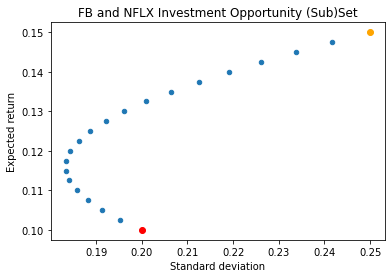

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Inputs
er_fb = 0.10
er_nf = 0.15
sd_fb = 0.20
sd_nf = 0.25
covar = 0.02
N = 21

# Correlation (not needed but illustrative)
correl = covar / (sd_fb * sd_nf)
print(f"Correlation = {correl: .3f}")

# Create dataframe where we will store our 21 expected returns and standard deviations
results = pd.DataFrame(np.nan, index = range(N), columns = ['w_fb', 'w_nf', 'er_p', 'sd_p'])
#print(results)

# Loop through the 21 allocations
for n in range(N):
    #print(n)
    #print(f"wc = {n*0.1: .3f}")
    
    # calculate the weight for the current capital allocation
    w_fb = n * (1 / (N-1))
    w_nf = 1 - w_fb
    
    # calculate expected return for the current complete portfolio
    er_p = w_fb * er_fb + w_nf * er_nf
    
    # calculate standard deviation for the current complete portfolio
    sd_p = ((w_fb**2) * (sd_fb**2) + (w_nf**2) * (sd_nf**2) + 2 * w_fb * w_nf * covar)**(1/2)
    
    # store results in our "results dataframe"
    results['w_fb'][n] = w_fb
    results['w_nf'][n] = w_nf
    results['er_p'][n] = er_p
    results['sd_p'][n] = sd_p
    
# Print results    
print(results) 

# Plot results in mean-volatility space
ax = results.plot.scatter(x = 'sd_p', y = 'er_p');
ax.set_xlabel('Standard deviation')
ax.set_ylabel('Expected return')
ax.set_title('FB and NFLX Investment Opportunity (Sub)Set')

# Add the 0% and 100% allocations to the plot in different colors
ax.scatter(results['sd_p'][0], results['er_p'][0], color = 'orange');
ax.scatter(results['sd_p'][20], results['er_p'][20], color = 'red');

## 2.2. Optimal risky portfolio (tangency portfolio)

The combination between two risky assets A and B that gives us the maximum Sharpe ratio is obtained by setting

$$w_A = \frac{(E[R_A] - R_f) \sigma_{B}^2 - (E[R_B] - R_f)Cov[R_A, R_B]}{(E[R_A] - R_f) \sigma_{B}^2 + (E[R_B] - R_f) \sigma_{A}^2 - (E[R_A] - R_f + E[R_B] - R_f)Cov[R_A, R_B]}$$

and $w_B = 1 - w_A$.

The reason why we also call this optimal risky portfolio the "tangency portfolio" is because its capital allocation line (CAL) intersects the investment opportunity set of A and B (see the curve we plotted in the previous example) at only one point (i.e. the CAL is tangent to the investment opportunity set). 

**Example 2.2.**

Using the data from the previous example, find the optimal combination of FB and NFLX. Assume that the risk-free rate is 0.1%.

In [2]:
# Inputs
rf = 0.001

# Assume A is FB and B is NFLX

# Numerator and denominator separately
num = (er_fb - rf) * sd_nf**2 - (er_nf - rf)*covar
denom = (er_fb - rf) * sd_nf**2 + (er_nf - rf) * sd_fb**2 - (er_fb - rf + er_nf - rf) * covar

# Optimal weights
w_fb = num / denom
w_nf = 1 - w_fb

# Print results
print(f"Optimal weights: \n W_FB = {w_fb: .3f} \n W_NF = {w_nf: .3}")

# Save results for next time
results = pd.DataFrame([w_fb, w_nf], columns = ['weight'], index = ['fb', 'nf'])
results.to_csv('./L07_example_results.csv')

Optimal weights: 
 W_FB =  0.446 
 W_NF =  0.554


# 3. Portfolio optimization with N risky assets

We now move on the the general case where we have an arbitrary number of assets N, and we want to find the combination (set of weights) that gives us the portfolio with the highest Sharpe ratio. Call these assets 1, 2, ..., N and assume we have already estimated their expected returns, standard deviations, and covariances between any two assets. 

## 3.1. Matrix notation

To make the formulas more manageable, we assemble our inputs (expected returns, variances and covariances) into matrices.

Let $\mathbf{\mu}$ be the Nx1 vector of expected returns:

$$\mathbf{\mu} = \begin{pmatrix} E[R_1] \\ E[R_2] \\ ... \\ E[R_N] \end{pmatrix}$$

And $\mathbf{\Sigma}$ the variance-covariance matrix of future returns. In row $i$ and column $j$ this matrix contains the covariance between the returns of assets $i$ and $j$. Note that when $i = j$ (on the diagonal) this equals the variance of asset $i$.


$$\mathbf{\Sigma} = \begin{pmatrix} Var[R_1] & Cov[R_1, R_2] & ... & Cov[R_1, R_N] \\ Cov[R_2, R_1] & Var[R_1] & ... & Cov[R_2, R_N] \\ ... & ... & ... & ... \\ Cov[R_N, R_1] & Cov[R_N, R_2] & ... & Var[R_N] \end{pmatrix}$$

Note that  $\mathbf{\mu}$ and $\mathbf{\Sigma}$ are bold to signify that they are not numbers (scalars) but matrices.

## 3.2. Tangency portfolio with N risky assets

Let $\mathbf{\mu^e}$ be the vector of risk premia on our N assets:


$$\mathbf{\mu^e} = \begin{pmatrix} E[R_1] - R_f \\ E[R_2] - R_f \\ ... \\ E[R_N] - R_f \end{pmatrix}$$

and $ \mathbf{1^{T}}$ be the transpose of a vector of N ones: $ \mathbf{1^{T}} = (1, 1, ..., 1)$.

Then the vector $\mathbf{W_{tan}}$ of weights that gives us the tangency portfolio (i.e. portfolio with the maximum Sharpe ratio) is given by:

$$\mathbf{W_{tan}} = \frac{ \mathbf{\Sigma}^{-1}\mathbf{\mu^e} }{ \mathbf{1^{T}}\Sigma^{-1}\mathbf{\mu^e} }$$

where $\mathbf{\Sigma}^{-1}$ is the inverse of the variance-covariance matrix $\mathbf{\Sigma}$

**Application 3.1**

You want to invest in the FANG stocks (Facebook, Aaple, Netflix, and Google) but you are not sure how much to invest in each. Download monthly price data on the FANG stocks over the past 5 years and calculate monthly returns. Use these data to estimate the optimal weights you should use for the four stocks. Assume that the risk-free rate is 0.1%.

In [3]:
# Import the needed libraries
import yfinance as yf
import pandas as pd
import numpy as np

In [4]:
# Inputs
rf = 0.001
N  = 4

In [5]:
# Download data on FANG stocks
price_dta = yf.download(tickers = ['FB', 'AAPL', 'NFLX', 'GOOG'],
                      start = '2016-01-01',
                      end = '2020-12-31',
                      interval = '1mo',
                      progress = False).dropna()
price_dta.head()

Adj Close                                          Close  \
                 AAPL          FB        GOOG        NFLX       AAPL   
Date                                                                   
2016-01-01  22.512041  112.209999  742.950012   91.839996  24.334999   
2016-02-01  22.361717  106.919998  697.770020   93.410004  24.172501   
2016-03-01  25.343138  114.099998  744.950012  102.230003  27.247499   
2016-04-01  21.797100  117.580002  693.010010   90.029999  23.434999   
2016-05-01  23.220165  118.809998  735.719971  102.570000  24.965000   

                                                     High              ...  \
                    FB        GOOG        NFLX       AAPL          FB  ...   
Date                                                                   ...   
2016-01-01  112.209999  742.950012   91.839996  26.462500  112.839996  ...   
2016-02-01  106.919998  697.770020   93.410004  24.722500  117.589996  ...   
2016-03-01  114.099998  744.950012  102.230003  27.605000  116.989998  ...   
2016-04-01  117.580002  693.010010   90.029999  28.097500  120.790001  ...   
2016-05-01  118.809998  735.719971  102.570000  25.182501  121.080002  ...   

                   Low                Open                          \
                  GOOG       NFLX     AAPL          FB        GOOG   
Date                                                                 
2016-01-01  673.260010  90.110001  25.6525  101.949997  743.000000   
2016-02-01  663.059998  79.949997  24.1175  112.269997  750.460022   
2016-03-01  685.340027  93.610001  24.4125  107.830002  703.619995   
2016-04-01  689.000000  88.209999  27.1950  113.750000  738.599976   
2016-05-01  689.010010  85.739998  23.4925  117.830002  697.630005   

                              Volume                                        
                  NFLX          AAPL           FB        GOOG         NFLX  
Date                                                                        
2016-01-01  109.000000  5.087392e+09  792709100.0  46561200.0  488193200.0  
2016-02-01   91.790001  3.243450e+09  874152500.0  64367000.0  389268900.0  
2016-03-01   94.580002  2.984198e+09  521458900.0  41742400.0  311333700.0  
2016-04-01  102.930000  3.489535e+09  741613800.0  42154000.0  340174300.0  
2016-05-01   90.410004  3.602686e+09  460544200.0  34996500.0  264997900.0  

[5 rows x 24 columns]

In [6]:
# Calculate monthly returns
ret_dta = price_dta['Adj Close'].pct_change()
ret_dta.head()

,AAPL,FB,GOOG,NFLX
Date,,,,
2016-01-01,NaN,NaN,NaN,NaN
2016-02-01,-0.006677,-0.047144,-0.060812,0.017095
2016-03-01,0.133327,0.067153,0.067615,0.094422
2016-04-01,-0.139921,0.030500,-0.069723,-0.119339
2016-05-01,0.065287,0.010461,0.061630,0.139287


In [7]:
# Estimate expected returns (mu vector)
er_vector = ret_dta.mean()
er_vector

AAPL    0.034139
FB      0.018289
GOOG    0.016508
NFLX    0.035464
dtype: float64

In [8]:
# Estimate variance-covariance matrix (sigma vector)
covar_matrix = ret_dta.cov()
covar_matrix

,AAPL,FB,GOOG,NFLX
AAPL,0.007467,0.004003,0.002902,0.003051
FB,0.004003,0.006586,0.003083,0.004626
GOOG,0.002902,0.003083,0.003820,0.002369
NFLX,0.003051,0.004626,0.002369,0.010778


In [9]:
# Vector of risk premia (mu_e vector)
risk_premia = np.array(er_vector - rf)
risk_premia

array([0.03313941, 0.01728946, 0.01550842, 0.03446385])

In [10]:
# Inverse of variance-covariance matrix
sigma_inverse = np.linalg.pinv(covar_matrix.values) 
sigma_inverse

array([[ 218.05263513,  -85.48335377,  -93.92823744,   -4.39807472],
       [ -85.48335377,  335.93516868, -152.54715393,  -86.44646141],
       [ -93.92823744, -152.54715393,  462.09559727,   -9.49996785],
       [  -4.39807472,  -86.44646141,   -9.49996785,  133.21286716]])

In [11]:
# Vector of ones
ones_t = np.ones(N)
ones_t

array([1., 1., 1., 1.])

In [12]:
# Weights for tangency portfolio
top = np.dot(sigma_inverse, risk_premia)
top

bottom = np.dot(np.dot(ones_t, sigma_inverse), risk_premia)
bottom

W_t = top / bottom
W_t

# Print results
results = pd.DataFrame(W_t, columns = ['W_tan'], index = er_vector.index )
print(results)

         W_tan
AAPL  0.731142
FB   -0.418520
GOOG  0.192288
NFLX  0.495091


In [13]:
# Save results for next time
results.to_csv('./L07_application_tangency.csv')
er_vector.to_csv('./L07_application_er_vector.csv')
covar_matrix.to_csv('./L07_application_covar_matrix.csv')